# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

# 实现一个神经网络
在这个作业中我们将要使用全连接层实现一个神经网络来进行分类操作，并且我们会在CIFAR-10数据集上测试该神经网络

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.


我们将会使用DSVC/classifiers/neural_net.py这个python文件中的TwoLayerNet类来创建一个神经网络对象，网络的参数都被保存在网络对象中的变量self.params中，这个参数变量内部是key-value形式存储，其中的每个key值表示参数名称，value是numpy类型的数组。接下来，我们初始化一组模拟数据和一个模拟的模型来进行神经网络的构建。

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.


# 前向传播：计算预测分数
打开文件DSVC/classifiers/neural_net.py查看TwoLayerNet.loss方法。这个函数和我们之前在SVM和Softmax练习中写过的loss函数非常相似：使用数据data和参数weights来计算具体每个类别的score，loss和各个参数的梯度值。

接下来请实现前向传播的第一步，需要对全部输入数据使用weights和biases来计算scores。

$$X=\left[\begin{array}{c}{-\left(x^{(1)}\right)^{T}-} \\ {-\left(x^{(2)}\right)^{T}-} \\ {\vdots} \\ {-\left(x^{(N)}\right)^{T}-}\end{array}\right] \in \mathbb{R}^{N \times D}, \vec{y}=\left[\begin{array}{c}{y^{(1)}} \\ {y^{(2)}} \\ {\vdots} \\ {y^{(N)}}\end{array}\right] \mathbb{R}^{N}, W \in \mathbb{R}^{D \times C}, b \in \mathbb{R}^{C}$$
$$Score=X W+b \in \mathbb{R}^{N \times C}$$
$$s_{j}^{(i)}=\sum_{k=1}^{D} W_{k j} x_{k}^{(i)}+b_{j}$$

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

# 前向传播：计算损失
接下来请实现该方法的第二部分，来计算数据data和正则化项的loss。

$s^{(i)}$所对应的损失值为$$\begin{aligned} L_{i} &amp;=-\log \left(\frac{e^{s_{y^{(i)}}}}{\sum_{j} e^{s_{j}^{(i)}}}\right) \\ &amp;=-s_{y^{(i)}}^{(i)}+\log \left(\sum_{j} e^{s_{j}^{(i)}}\right) \end{aligned}$$

$e^{s_{y^{(i)}}}$

```python
score_y = scores[np.arange(N),y]  # 取出score的第y列
p_n = np.exp(score_y)
```
$\sum_{j} e^{s_{j}^{(i)}}$
```python
p_m = np.sum(np.exp(scores),axis=1)  # 计算每行的score指数之和
```

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

# 反向传播
实现该方法的剩余部分，这部分将计算loss对于变量W1, b1, W2, 和b2的梯度值。现在你应该已经正确的实现了前向传播算法，你可以检查你所实现的反向传播算法的正确性，通过我们提供的一个数值梯度计算函数。

$$s_{j}^{(i)}=\sum_{k=1}^{d} W_{k j} x_{k}^{(i)}+b_{j}，L_{i}=-\log \left(\frac{e^{s_{y^{(i)}}^{(i)}}}{\sum_{j} e^{s_{j}^{(i)}}}\right)$$
$$\frac{\partial s_{j}^{(i)}}{\partial b_{k}}=1\{j=k\} \\$$
$$\nabla_{b} s_{j}^{(i)}=\left[\begin{array}{c}{1\{j=1\}} \\ {1\{j=2\}} \\ {\vdots} \\ {1\{j=c\}}\end{array}\right] \triangleq Z_{j}^{(i)} \in \mathbb{R}^{C}$$

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

# 训练网络
为了训练网络我们应该使用在SVM和Softmax分类器中类似的随机梯度下降方法，查看方法TwoLayerNet.train并且补充缺失部分来实现训练过程。该方法应该和你之前在SVM和Softmax分类器使用的训练过程非常类似。同样你需要实现方法TwoLayerNet.predict，为了在网络训练过程中，周期性的执行预测，并且来跟踪这些预测值。

当你实现了上述方法后，运行下面的代码来训练一个两层神经网络通过我们提供的模拟数据。你的训练loss应该小于0.2.

Final training loss:  0.01714960793873202


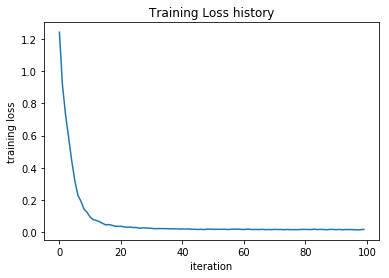

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

# 加载数据
现在你已经实现了一个两层神经网络并且在之前的模拟数据集上通过了梯度检测，接下来请加载我们最喜欢的CIFAR-10数据集，在真实的数据集上使用你实现的算法训练一个分类器。

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

# 训练一个网络
为了训练我们的网络我们需要使用动量梯度下降方法。除此之外，随着优化的进行，我们会以一种指数型的学习率调度策略来调整我们的学习率；在每个epoch之后，我们会给学习率乘上一个衰减指数来减小学习率。

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training 优化训练
使用我们提供的默认参数，你应该能够在验证集上获得0.29左右的准确率，这个效果有点low，我们的训练应该存在一定的问题。
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

深入了解问题的一种策略是我们在训练过程中绘制损失函数和验证准确率的图像。
One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

另一种策略是可视化我们在网络第一层中学习到的权重，在大多数针对图像数据的神经网络中，第一层的权重在可视化时往往会显示一些可见的结构。
Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

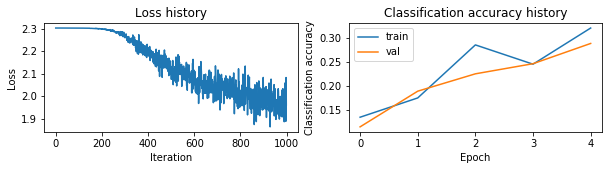

In [18]:
# Plot the loss function and train / validation accuracies
plt.figure(2, (10, 2))
plt.subplot(1, 2, 1)

plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

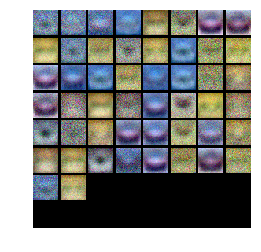

In [19]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).
# 调整超参数

**问题所在**. 观察上面的可视化结果，我们看到loss曲线呈一种线性下降的趋势，这可能表明学习率太低了，此外，训练集上的准确率和验证集上的准确率之间没有明显的区别，这表明我们的模型容量太小了，我们应该增大数据规模，从另一个方面考虑，一个数据规模很大的模型可能会更容易产生过拟合的现象，这表现在训练集上的准确率和验证集上的准确率有很大的差异。

**调整**. 调整超参数并且熟悉它们的变化会如何影响神经网络最后的性能是我们学习神经网络中的一个重要部分，因此我们希望你能够进行大量的练习。下面，你应该测试各种超参数的不同值，包括隐藏层的单元数，学习率，训练批次和正则化项系数。你可能会考虑调整学习率的衰减系数，但是你应该会发现默认值的效果最好。

**预期结果**. 你的目标应该是在验证集上取得高于48%的分类准确率。我们得到的最佳网络在验证集上的准确率超过了52%。

**实验**: 本次作业的目标是通过使用一个全连接神经网络在CIFAR-10数据集上获得尽可能好的分类效果。...请随意实现你自己的额外技巧来提高准确率(例如使用PCA来对数据降维，或者添加dropout，或者提取其他更有用的特征等等)。

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [24]:
best_net = None # store the best model into this 
learning_rates = np.linspace(0.0005, 0.002, 10)
regularization_strengths = np.arange(10) / 10
results = {}
best_val = -1

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        loss = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=True)
        y_train_pred = net.predict(X_train)
        y_val_pred = net.predict(X_val)
        val_accuracy = np.mean(y_val_pred == y_val)
        train_accuracy = np.mean(y_train_pred == y_train)
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

iteration 0 / 1000: loss 2.302583
iteration 100 / 1000: loss 2.136229
iteration 200 / 1000: loss 1.864458
iteration 300 / 1000: loss 1.759574
iteration 400 / 1000: loss 1.642433
iteration 500 / 1000: loss 1.685397
iteration 600 / 1000: loss 1.606232
iteration 700 / 1000: loss 1.643966
iteration 800 / 1000: loss 1.638769
iteration 900 / 1000: loss 1.550576
iteration 0 / 1000: loss 2.302716
iteration 100 / 1000: loss 2.140992
iteration 200 / 1000: loss 1.968513
iteration 300 / 1000: loss 1.779629
iteration 400 / 1000: loss 1.722708
iteration 500 / 1000: loss 1.716407
iteration 600 / 1000: loss 1.716708
iteration 700 / 1000: loss 1.650433
iteration 800 / 1000: loss 1.629404
iteration 900 / 1000: loss 1.680041
iteration 0 / 1000: loss 2.302902
iteration 100 / 1000: loss 2.127868
iteration 200 / 1000: loss 1.918747
iteration 300 / 1000: loss 1.905500
iteration 400 / 1000: loss 1.771009
iteration 500 / 1000: loss 1.750733
iteration 600 / 1000: loss 1.645174
iteration 700 / 1000: loss 1.61525

iteration 900 / 1000: loss 1.630359
iteration 0 / 1000: loss 2.303028
iteration 100 / 1000: loss 2.003668
iteration 200 / 1000: loss 1.832815
iteration 300 / 1000: loss 1.839946
iteration 400 / 1000: loss 1.659184
iteration 500 / 1000: loss 1.660804
iteration 600 / 1000: loss 1.599064
iteration 700 / 1000: loss 1.697182
iteration 800 / 1000: loss 1.497909
iteration 900 / 1000: loss 1.643981
iteration 0 / 1000: loss 2.303218
iteration 100 / 1000: loss 2.042547
iteration 200 / 1000: loss 1.874261
iteration 300 / 1000: loss 1.711033
iteration 400 / 1000: loss 1.605675
iteration 500 / 1000: loss 1.646285
iteration 600 / 1000: loss 1.543196
iteration 700 / 1000: loss 1.581039
iteration 800 / 1000: loss 1.520868
iteration 900 / 1000: loss 1.574968
iteration 0 / 1000: loss 2.303349
iteration 100 / 1000: loss 1.975664
iteration 200 / 1000: loss 1.875121
iteration 300 / 1000: loss 1.695193
iteration 400 / 1000: loss 1.723591
iteration 500 / 1000: loss 1.621454
iteration 600 / 1000: loss 1.65944

iteration 800 / 1000: loss 1.644151
iteration 900 / 1000: loss 1.539934
iteration 0 / 1000: loss 2.303519
iteration 100 / 1000: loss 1.968637
iteration 200 / 1000: loss 1.714202
iteration 300 / 1000: loss 1.621905
iteration 400 / 1000: loss 1.637041
iteration 500 / 1000: loss 1.602007
iteration 600 / 1000: loss 1.699064
iteration 700 / 1000: loss 1.601705
iteration 800 / 1000: loss 1.652551
iteration 900 / 1000: loss 1.563638
iteration 0 / 1000: loss 2.303650
iteration 100 / 1000: loss 1.878985
iteration 200 / 1000: loss 1.824634
iteration 300 / 1000: loss 1.707085
iteration 400 / 1000: loss 1.721599
iteration 500 / 1000: loss 1.595979
iteration 600 / 1000: loss 1.688866
iteration 700 / 1000: loss 1.648007
iteration 800 / 1000: loss 1.531571
iteration 900 / 1000: loss 1.694434
iteration 0 / 1000: loss 2.303824
iteration 100 / 1000: loss 1.873602
iteration 200 / 1000: loss 1.827579
iteration 300 / 1000: loss 1.714510
iteration 400 / 1000: loss 1.671322
iteration 500 / 1000: loss 1.74831

iteration 700 / 1000: loss 1.749244
iteration 800 / 1000: loss 1.662337
iteration 900 / 1000: loss 1.653495
iteration 0 / 1000: loss 2.303988
iteration 100 / 1000: loss 1.860099
iteration 200 / 1000: loss 1.885995
iteration 300 / 1000: loss 1.650334
iteration 400 / 1000: loss 1.665768
iteration 500 / 1000: loss 1.686524
iteration 600 / 1000: loss 1.757526
iteration 700 / 1000: loss 1.678195
iteration 800 / 1000: loss 1.736829
iteration 900 / 1000: loss 1.714089
iteration 0 / 1000: loss 2.302575
iteration 100 / 1000: loss 1.871314
iteration 200 / 1000: loss 1.683860
iteration 300 / 1000: loss 1.553979
iteration 400 / 1000: loss 1.568315
iteration 500 / 1000: loss 1.560210
iteration 600 / 1000: loss 1.424857
iteration 700 / 1000: loss 1.499880
iteration 800 / 1000: loss 1.396006
iteration 900 / 1000: loss 1.633087
iteration 0 / 1000: loss 2.302729
iteration 100 / 1000: loss 1.844095
iteration 200 / 1000: loss 1.682287
iteration 300 / 1000: loss 1.812849
iteration 400 / 1000: loss 1.61880

iteration 600 / 1000: loss 1.446868
iteration 700 / 1000: loss 1.533399
iteration 800 / 1000: loss 1.398760
iteration 900 / 1000: loss 1.653109
iteration 0 / 1000: loss 2.302892
iteration 100 / 1000: loss 1.736369
iteration 200 / 1000: loss 1.709087
iteration 300 / 1000: loss 1.546958
iteration 400 / 1000: loss 1.548128
iteration 500 / 1000: loss 1.577858
iteration 600 / 1000: loss 1.619246
iteration 700 / 1000: loss 1.735026
iteration 800 / 1000: loss 1.571064
iteration 900 / 1000: loss 1.452586
iteration 0 / 1000: loss 2.303044
iteration 100 / 1000: loss 1.800282
iteration 200 / 1000: loss 1.585916
iteration 300 / 1000: loss 1.800165
iteration 400 / 1000: loss 1.642382
iteration 500 / 1000: loss 1.707713
iteration 600 / 1000: loss 1.641435
iteration 700 / 1000: loss 1.670003
iteration 800 / 1000: loss 1.537629
iteration 900 / 1000: loss 1.607626
iteration 0 / 1000: loss 2.303179
iteration 100 / 1000: loss 1.773686
iteration 200 / 1000: loss 1.618800
iteration 300 / 1000: loss 1.64762

In [25]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.491


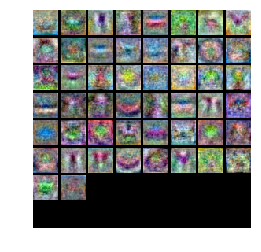

In [26]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

# 在测试集上运行
当你完成了测试，你应该在测试集上评估你的最佳网络模型，你应该能够得到大于48%的分类准确率。

**当准确率超过52%时，准确率每提高1%，我们会给你额外的奖励分数**

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [27]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.479


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.


$\color{blue}{\textit Your Answer:}$1，3

$\color{blue}{\textit Your Explanation:}$